<a href="https://colab.research.google.com/github/Uma1709/Data-Science-Project-Series/blob/main/phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the Structure and Characteristics
Load and Inspect the Data:
Read the dataset into a DataFrame (e.g., using Pandas in Python).
Check the first few rows to understand the structure.
Inspect the data types and missing values.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/infolimpioavanzadoTarget.csv")
df.head(10)


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801553,-1.180000,-7.036376,0


#

In [2]:

#Display the first few rows
print(df.head())



         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [3]:
# Check data types and missing values
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

#Handle Missing Values: Identify and handle missing values appropriately.



In [4]:

print(df.isnull().sum())
df = df.fillna(method='ffill')

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


<ipython-input-4-077b203d41b5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill as an example


#Data Types: Ensure that data types are correct for each column.



In [5]:

df['date'] = pd.to_datetime(df['date'])

#EDA:
#Visualization and Trend Analysis:

Time Series Plot: Plot stock prices over time to identify trends and seasonality.



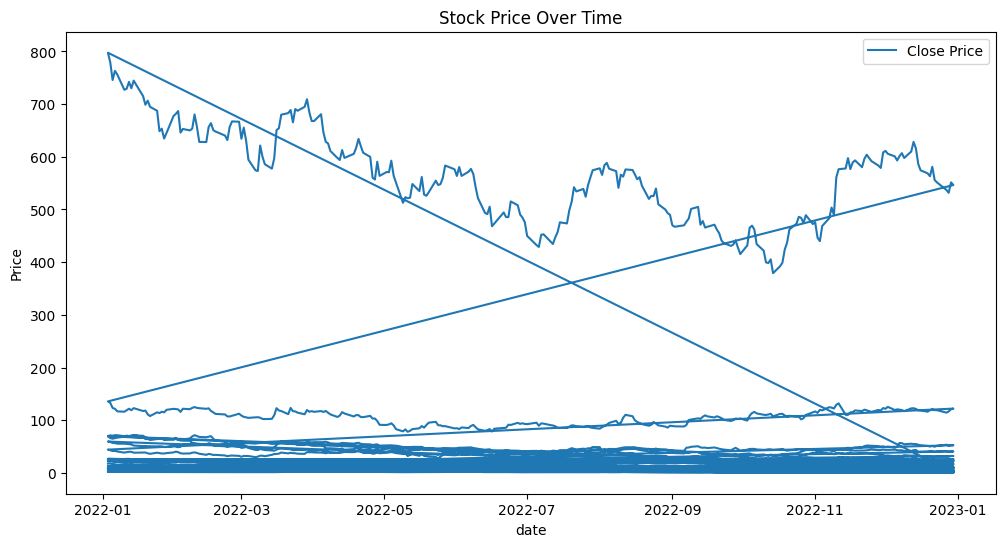

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

#Rolling Statistics:
Plot rolling means and standard deviations to understand volatility.

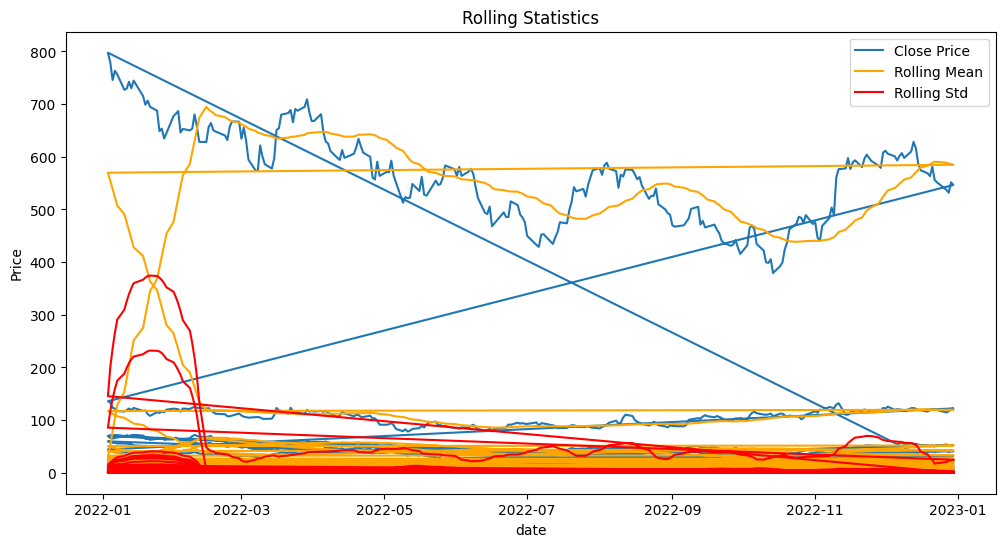

In [7]:
df['Rolling_Mean'] = df['close'].rolling(window=30).mean()
df['Rolling_Std'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['Rolling_Mean'], label='Rolling Mean', color='orange')
plt.plot(df['date'], df['Rolling_Std'], label='Rolling Std', color='red')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Rolling Statistics')
plt.legend()
plt.show()


#Correlation Analysis:
Analyze correlations between different stock features (e.g., Open, High, Low, Volume).

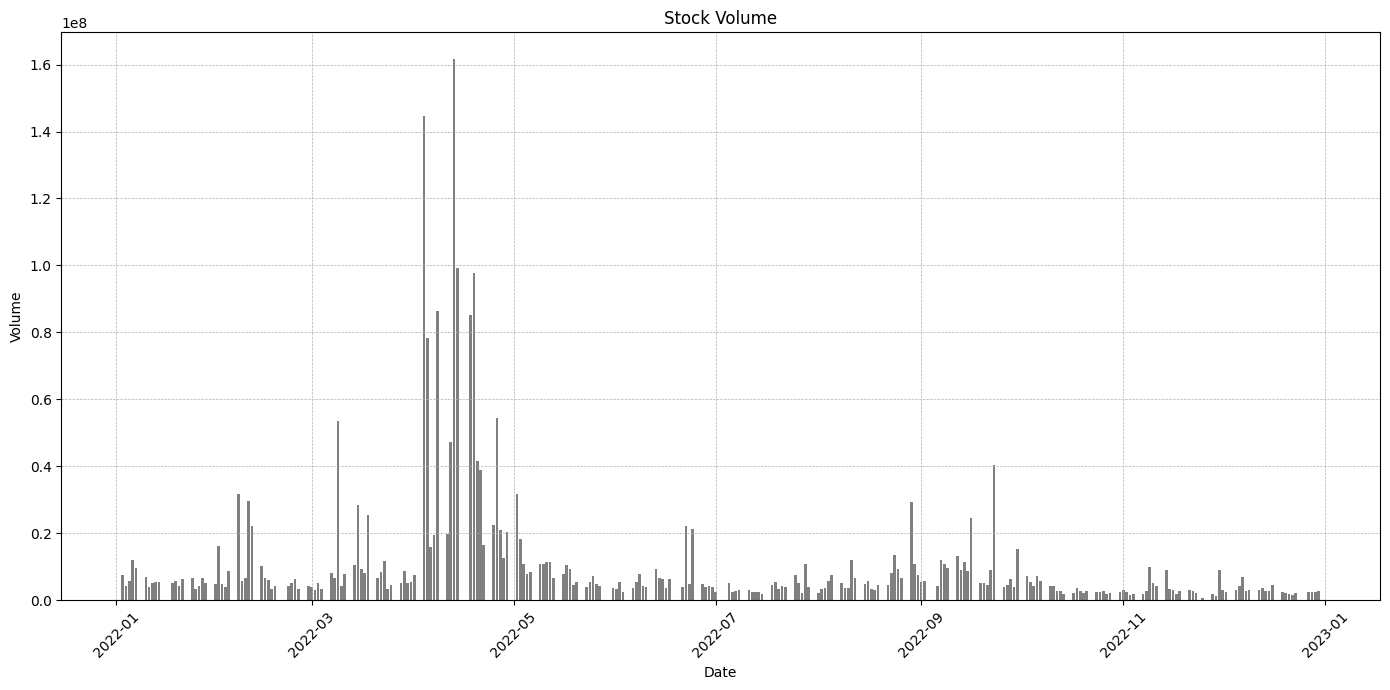

In [11]:
plt.figure(figsize=(14, 7))
plt.bar(df['date'], df['volume'], color='gray')
plt.title('Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#Predictive Modeling

In [24]:
# Feature Engineering: Create a moving average
df['MA50'] = df['close'].rolling(window=50).mean()

# Drop rows with missing values (due to moving average)
df.dropna(inplace=True)

# Define features and target
X = df[['open', 'high', 'low', 'volume', 'MA50']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 0.7399547454532621
MAE: 0.29158462450714967
R2 Score: 0.999918386388202


In [26]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))


Random Forest Regression:
MSE: 2.968501134267554
MAE: 0.4578558840877883
R2 Score: 0.9996725879512461


In [27]:
# Reshape the data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, batch_size=1, epochs=10)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluation
print('LSTM Model:')
print('MSE:', mean_squared_error(y_test, y_pred_lstm))
print('MAE:', mean_absolute_error(y_test, y_pred_lstm))
print('R2 Score:', r2_score(y_test, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 6016.1260
Epoch 2/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 111.3453
Epoch 3/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 75.8659
Epoch 4/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67.1078
Epoch 5/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 68.7488
Epoch 6/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 48.4299
Epoch 7/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 58.3492
Epoch 8/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 58.8560
Epoch 9/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 36.5390
Epoch 10/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 47.1288
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM Model:
MSE: 16.347565461480464
MAE: 1.7066395270551873
R2 Score: 0.9981969385700765


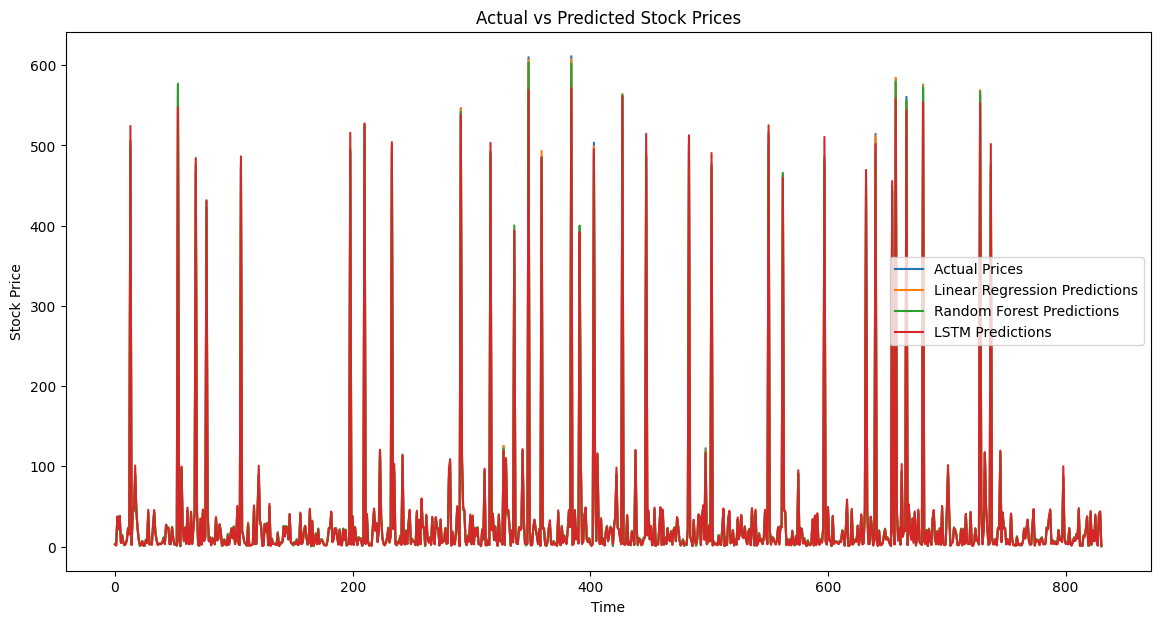

In [28]:
# Plotting the predicted vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_lr, label='Linear Regression Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.plot(y_pred_lstm, label='LSTM Predictions')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
